<a href="https://colab.research.google.com/github/Najila-1234/dendrogram_agglomerative-clustering/blob/main/dend_%26_agg_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
x=pd.read_csv('/content/CC GENERAL.csv',nrows=1000)
x

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C11029,1250.394614,0.909091,443.99,443.99,0.00,0.000000,0.272727,0.272727,0.000000,0.000000,0,3,3500,273.823646,259.715939,0.000000,11
996,C11030,9.503968,1.000000,96.62,0.00,96.62,0.000000,1.000000,0.000000,1.000000,0.000000,0,19,4500,1086.932525,92.217936,0.250000,12
997,C11031,2285.068731,1.000000,0.00,0.00,0.00,1173.310874,0.000000,0.000000,0.000000,0.166667,5,0,2500,381.672065,1003.265207,0.000000,12
998,C11032,2928.756699,1.000000,160.92,0.00,160.92,319.931964,1.000000,0.000000,1.000000,0.333333,5,12,3000,1142.847203,1098.479834,0.000000,12


In [ ]:
x.isna().sum()

CUST_ID                              0
BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    74
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

In [ ]:
# fill the missing value with 0
#x['MINIMUM_PAYMENTS']=x['MINIMUM_PAYMENTS'].fillna(x['MINIMUM_PAYMENTS'].mean(),inplace=True)
# or
m=x['MINIMUM_PAYMENTS'].mean()
m

1297.1163216976242

In [ ]:
x['MINIMUM_PAYMENTS'].fillna(m,inplace=True)

In [ ]:
x.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
x=x.drop(['CUST_ID'],axis=1)

In [ ]:
x.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                          int64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
x.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import normalize
x_nor=normalize(x)
x_nor

array([[3.93529208e-02, 7.87219116e-04, 9.17897286e-02, ...,
        1.34230246e-01, 0.00000000e+00, 1.15458778e-02],
       [2.93875725e-01, 8.34231054e-05, 0.00000000e+00, ...,
        9.84037362e-02, 2.03922922e-05, 1.10118488e-03],
       [3.10797802e-01, 1.24560826e-04, 9.63066935e-02, ...,
        7.81351110e-02, 0.00000000e+00, 1.49472991e-03],
       ...,
       [6.10697609e-01, 2.67255685e-04, 0.00000000e+00, ...,
        2.68128330e-01, 0.00000000e+00, 3.20706822e-03],
       [6.50917815e-01, 2.22250559e-04, 3.57645600e-02, ...,
        2.44137758e-01, 0.00000000e+00, 2.66700671e-03],
       [4.83272157e-01, 3.30967845e-04, 3.10434600e-01, ...,
        4.37160630e-01, 0.00000000e+00, 3.97161414e-03]])

In [ ]:
# convert to dataframe
x_new=pd.DataFrame(x_nor,columns=x.columns)
x_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495
3,0.206334,0.000079,0.185576,0.185576,0.000000,0.025477,0.000010,0.000010,0.000000,0.000010,0.000124,0.000124,0.928499,0.000000,0.160583,0.000000,0.001486
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.330078,0.000240,0.117204,0.117204,0.000000,0.000000,0.000072,0.000072,0.000000,0.000000,0.000000,0.000792,0.923927,0.072284,0.068560,0.000000,0.002904
996,0.002052,0.000216,0.020857,0.000000,0.020857,0.000000,0.000216,0.000000,0.000216,0.000000,0.000000,0.004102,0.971417,0.234637,0.019907,0.000054,0.002590
997,0.610698,0.000267,0.000000,0.000000,0.000000,0.313574,0.000000,0.000000,0.000000,0.000045,0.001336,0.000000,0.668139,0.102004,0.268128,0.000000,0.003207
998,0.650918,0.000222,0.035765,0.000000,0.035765,0.071105,0.000222,0.000000,0.000222,0.000074,0.001111,0.002667,0.666752,0.253998,0.244138,0.000000,0.002667


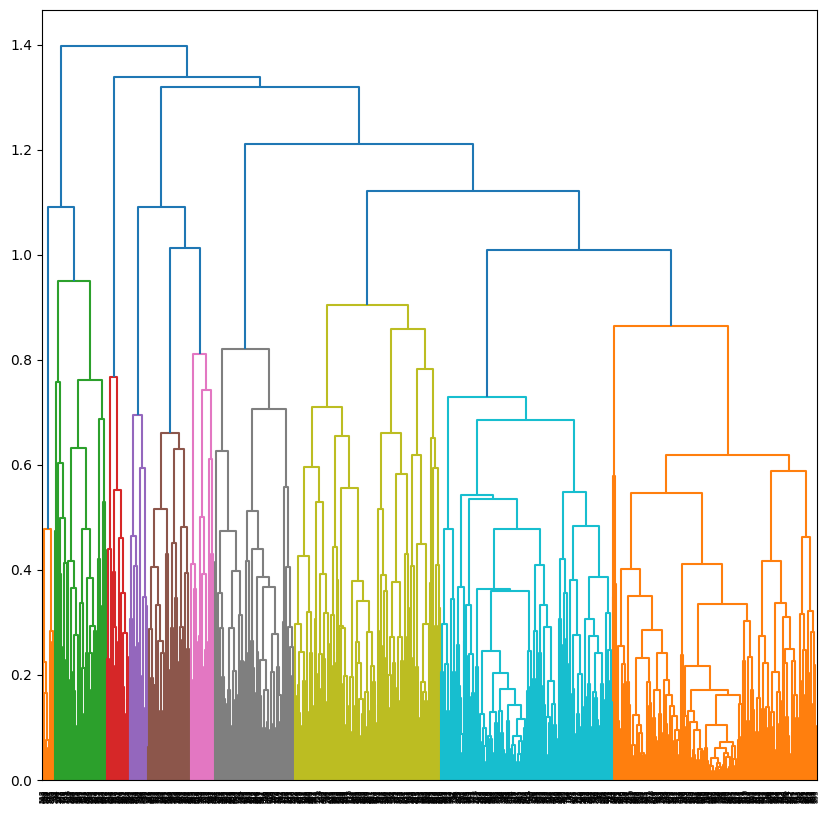

In [ ]:
# visualization, draw dendrogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
dend=shc.dendrogram(shc.linkage(x_new,method='complete'))





In [ ]:
# do agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y=cluster.fit_predict(x_new)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

In [ ]:
x_new['cluster']=y
x_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546,0
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101,0
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495,0
3,0.206334,0.000079,0.185576,0.185576,0.000000,0.025477,0.000010,0.000010,0.000000,0.000010,0.000124,0.000124,0.928499,0.000000,0.160583,0.000000,0.001486,0
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.330078,0.000240,0.117204,0.117204,0.000000,0.000000,0.000072,0.000072,0.000000,0.000000,0.000000,0.000792,0.923927,0.072284,0.068560,0.000000,0.002904,0
996,0.002052,0.000216,0.020857,0.000000,0.020857,0.000000,0.000216,0.000000,0.000216,0.000000,0.000000,0.004102,0.971417,0.234637,0.019907,0.000054,0.002590,0
997,0.610698,0.000267,0.000000,0.000000,0.000000,0.313574,0.000000,0.000000,0.000000,0.000045,0.001336,0.000000,0.668139,0.102004,0.268128,0.000000,0.003207,0
998,0.650918,0.000222,0.035765,0.000000,0.035765,0.071105,0.000222,0.000000,0.000222,0.000074,0.001111,0.002667,0.666752,0.253998,0.244138,0.000000,0.002667,0


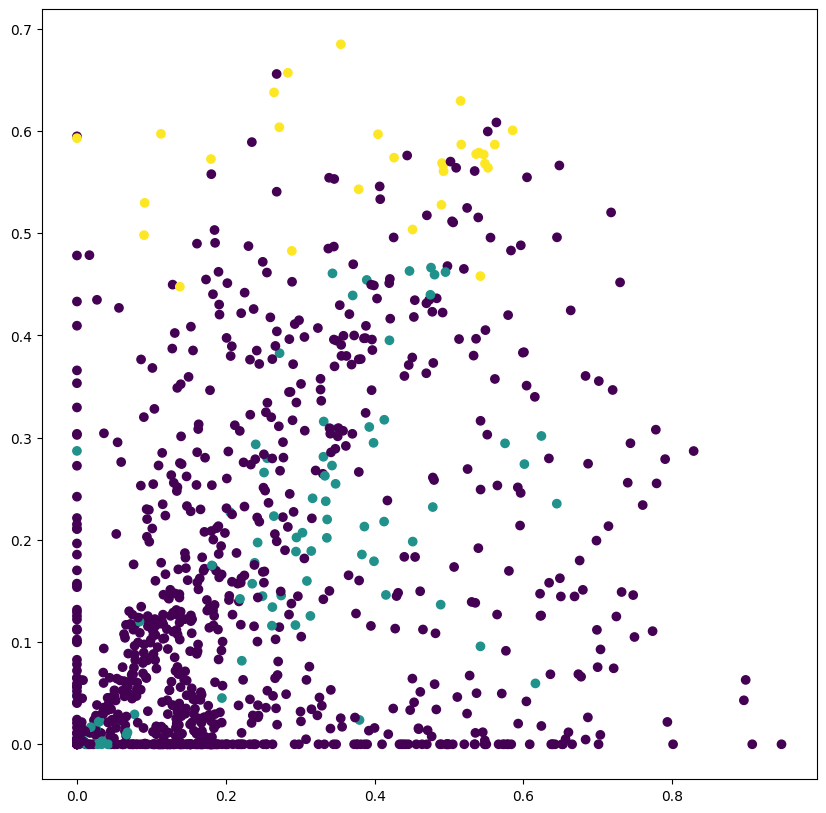

In [ ]:
#  take any 2 colms and show as scatter plot
plt.figure(figsize=(10,10))
plt.scatter(x_new['PAYMENTS'],x_new['PURCHASES'],c=cluster.labels_)